In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from tqdm.notebook import tqdm

In [2]:
CI02 = utils.load_data("data/for_learning_plus/CI02.npy")
CI04 = utils.load_data("data/for_learning_plus/CI04.npy")
CI06 = utils.load_data("data/for_learning_plus/CI06.npy")
CI09 = utils.load_data("data/for_learning_plus/CI09.npy")
CI21 = utils.load_data("data/for_learning_plus/CI21.npy")

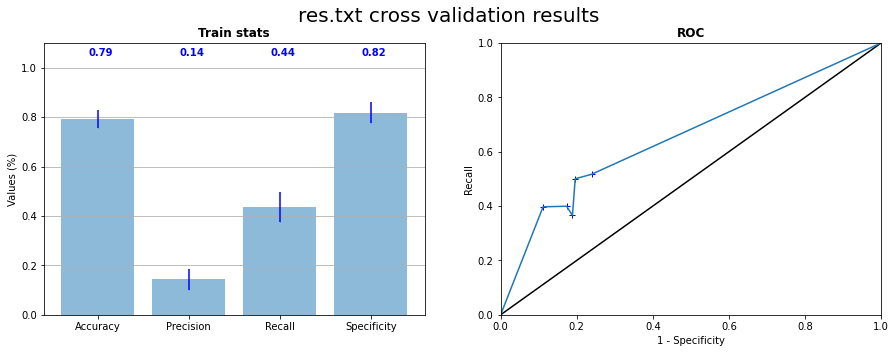

In [3]:
file = "../RUN_GRICAD/res/SVM-under-rbf-cw0.65-C1.0_res.txt"
utils.plot_res_CV(file)

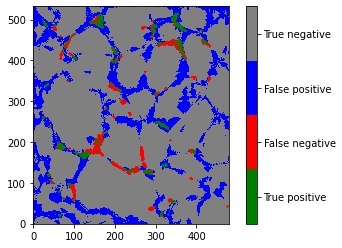

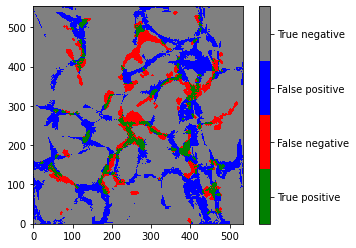

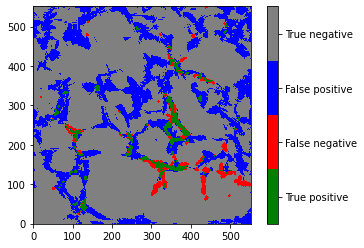

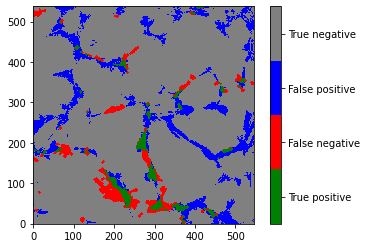

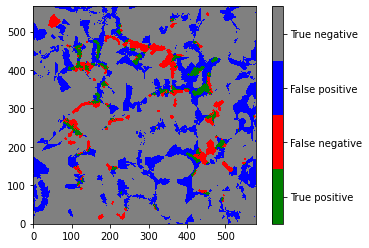

In [4]:
y_pred = np.load("../RUN_GRICAD/pred/SVM-under-rbf-cw0.65-C1.0-CI02.npy")
y_val = CI02['Y'] 
im_shape = np.shape(np.load("data/for_learning/CI02.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)

y_pred = np.load("../RUN_GRICAD/pred/SVM-under-rbf-cw0.65-C1.0-CI04.npy")
y_val = CI04['Y'] 
im_shape = np.shape(np.load("data/for_learning/CI04.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)

y_pred = np.load("../RUN_GRICAD/pred/SVM-under-rbf-cw0.65-C1.0-CI06.npy")
y_val = CI06['Y'] 
im_shape = np.shape(np.load("data/for_learning/CI06.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)

y_pred = np.load("../RUN_GRICAD/pred/SVM-under-rbf-cw0.65-C1.0-CI09.npy")
y_val = CI09['Y'] 
im_shape = np.shape(np.load("data/for_learning/CI09.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)

y_pred = np.load("../RUN_GRICAD/pred/SVM-under-rbf-cw0.65-C1.0-CI21.npy")
y_val = CI21['Y'] 
im_shape = np.shape(np.load("data/for_learning/CI21.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)

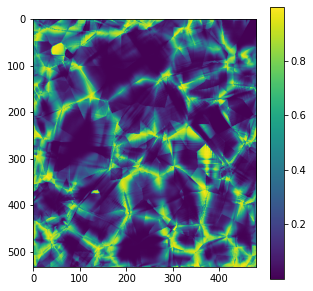

In [5]:
X_val = CI02[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatness_an']] 

y_val = CI02['Y'] 
im_shape = np.shape(np.load("data/for_learning/CI02.npy"))
y_pred_prob = np.load("../RUN_GRICAD/pred/SVM-under-rbf-cw0.65-C1.0-prob-CI02.npy")
plt.figure(figsize=(5,5))
plt.imshow(y_pred_prob.T[1].reshape(im_shape[0], im_shape[1]))
plt.colorbar()

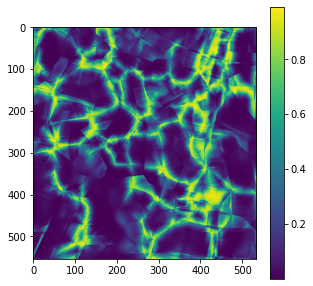

In [20]:
X_val = CI04[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatness_an']] 

y_val = CI04['Y'] 
im_shape = np.shape(np.load("data/for_learning/CI04.npy"))
y_pred_prob = np.load("../RUN_GRICAD/pred/SVM-under-rbf-cw0.65-C1.0-prob-CI04.npy")
plt.figure(figsize=(5,5))
plt.imshow(y_pred_prob.T[1].reshape(im_shape[0], im_shape[1]))
plt.colorbar()

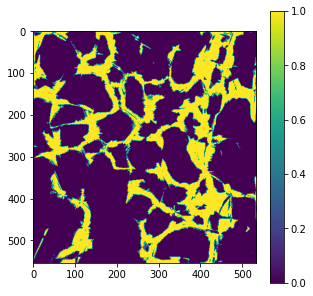

In [27]:
im_shape = np.shape(np.load("data/for_learning/CI04.npy"))
y_pred_prob = np.load("../RUN_GRICAD/pred/SVM-under-rbf-cw0.65-C1.0-prob-CI04.npy")
plt.figure(figsize=(5,5))
plt.imshow(y_pred_prob.T[1].reshape(im_shape[0], im_shape[1])>0.4)
plt.colorbar()

In [26]:
plt.figure(figsize=(5,5))
plt.imshow(np.load("data/for_learning/CI04.npy")[:,:,0])
plt.colorbar()

In [7]:
X_val = CI04[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatness_an']] 

y_val = CI04['Y'] 
im_shape = np.shape(np.load("data/for_learning/CI04.npy"))
y_pred_prob = np.load("../RUN_GRICAD/pred/SVM-under-rbf-cw0.65-C1.0-prob-CI04.npy")


specif = []
Recall = []

p = np.linspace(0,1,100)
for i in tqdm(p):
    y_pred = np.array(y_pred_prob.T[1]>i)
    cm = metrics.confusion_matrix(y_val, y_pred)
    specif.append(cm[0,0] / (cm[0,0] + cm[0,1]))
    Recall.append(metrics.recall_score(y_val, y_pred))

  0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
specif = np.array(specif)
Recall = np.array(Recall)

Text(0.5, 0, '1 - Specificity')

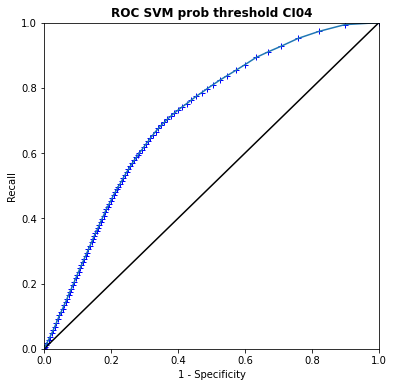

In [9]:
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(1-specif,Recall,'+b')
plt.plot([0,1],[0,1],"black")

xc = np.append(np.insert(1-specif,0,0),1)
yc = np.append(np.insert(Recall,0,0),1)
yc = [y for _, y in sorted(zip(xc, yc))]
xc = np.sort(xc)
plt.plot(xc,yc)

plt.xlim(0,1)
plt.ylim(0,1)

ax.set_title('ROC SVM prob threshold CI04',fontweight='bold')
ax.set_ylabel('Recall')
ax.set_xlabel('1 - Specificity')

In [10]:
plt.plot(p,specif,"b+")
plt.title("Specif")
plt.xlabel("prob >")
plt.figure()
plt.plot(p,Recall,"b+")
plt.title("Recall")
plt.xlabel("prob >")

Text(0.5, 0, 'prob >')

In [11]:
y_pred = np.array(y_pred_prob.T[1]>0.5)
utils.plot_pred_proj(y_pred,y_val,im_shape)

----------------------------

In [12]:
y_val1 = CI02['Y'] 
y_val2 = CI04['Y'] 
y_val3 = CI06['Y']
y_val4 = CI09['Y']
y_val5 = CI21['Y']

im_shape1 = np.shape(np.load("data/for_learning/CI02.npy"))
im_shape2 = np.shape(np.load("data/for_learning/CI04.npy"))
im_shape3 = np.shape(np.load("data/for_learning/CI06.npy"))
im_shape4 = np.shape(np.load("data/for_learning/CI09.npy"))
im_shape5 = np.shape(np.load("data/for_learning/CI21.npy"))

y_pred_prob1 = np.load("../RUN_GRICAD/pred/SVM-under-rbf-cw0.65-C1.0-prob-CI02.npy")
y_pred_prob2 = np.load("../RUN_GRICAD/pred/SVM-under-rbf-cw0.65-C1.0-prob-CI04.npy")
y_pred_prob3 = np.load("../RUN_GRICAD/pred/SVM-under-rbf-cw0.65-C1.0-prob-CI06.npy")
y_pred_prob4 = np.load("../RUN_GRICAD/pred/SVM-under-rbf-cw0.65-C1.0-prob-CI09.npy")
y_pred_prob5 = np.load("../RUN_GRICAD/pred/SVM-under-rbf-cw0.65-C1.0-prob-CI21.npy")

l_yv = [y_val1,y_val2,y_val3,y_val4,y_val5]
l_is = [im_shape1,im_shape2,im_shape3,im_shape4,im_shape5]
l_ypp = [y_pred_prob1,y_pred_prob2,y_pred_prob3,y_pred_prob4,y_pred_prob5]


rec = []
spec = []

for i in range(len(l_yv)):

    y_val = l_yv[i]
    imshape = l_is[i]
    y_pred_prob = l_ypp[i]

    specif = []
    Recall = []

    p = np.linspace(0,1,100)
    for i in tqdm(p):
        y_pred = np.array(y_pred_prob.T[1]>i)
        cm = metrics.confusion_matrix(y_val, y_pred)
        specif.append(cm[0,0] / (cm[0,0] + cm[0,1]))
        Recall.append(metrics.recall_score(y_val, y_pred))

    specif = np.array(specif)
    Recall = np.array(Recall)

    rec.append(Recall)
    spec.append(specif)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [13]:
from matplotlib import colors
import matplotlib.patches as mpatches
from matplotlib import cm

colormap = cm.get_cmap('gist_rainbow', len(l_yv)) 
names = ['val_CI02','val_CI04','val_CI06','val_CI09','val_CI21']

fig, ax = plt.subplots(figsize=(6,6))

handles = []

for i in range(len(l_yv)):
    specif = spec[i]
    Recall = rec[i]

    plt.plot([0,1],[0,1],"black")

    xc = np.append(np.insert(1-specif,0,0),1)
    yc = np.append(np.insert(Recall,0,0),1)
    yc = [y for _, y in sorted(zip(xc, yc))]
    xc = np.sort(xc)
    plt.plot(xc,yc,color=colors.rgb2hex(colormap(i)))
    handles.append(mpatches.Patch(color=colors.rgb2hex(colormap(i)), label=names[i]))

plt.xlim(0,1)
plt.ylim(0,1)

legend = ax.legend(handles=handles , loc = "lower right",title="Model")
ax.add_artist(legend)

ax.set_title('ROC SVM CV prob threshold',fontweight='bold')
ax.set_ylabel('Recall')
ax.set_xlabel('1 - Specificity')

Text(0.5, 0, '1 - Specificity')

In [14]:
sd_rec = np.std(np.array(rec).T,axis=1)
sd_spec = np.std(np.array(spec).T,axis=1)
m_rec = np.mean(np.array(rec).T,axis=1)
m_spec = np.mean(np.array(spec).T,axis=1)

Text(0.5, 0, '1 - Specificity')

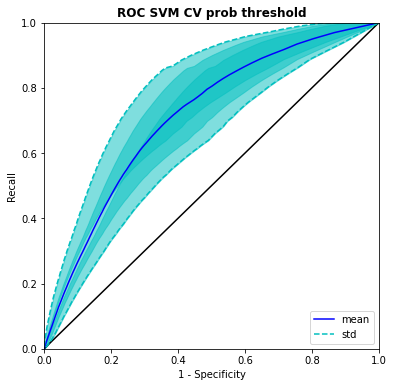

In [19]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize=(6,6))

plt.plot([0,1],[0,1],"black")

m = plt.plot(1-m_spec,m_rec,"b")
s = plt.plot((1-m_spec)-sd_spec,m_rec+sd_rec,"--c")
plt.plot((1-m_spec)+sd_spec,m_rec-sd_rec,"--c")

plt.fill_between((1-m_spec)-sd_spec,m_rec+sd_rec,m_rec-sd_rec,color="c",alpha=0.5)
plt.fill_between((1-m_spec)+sd_spec,m_rec+sd_rec,m_rec-sd_rec,color="c",alpha=0.5)
plt.fill_between((1-m_spec),m_rec+sd_rec,m_rec-sd_rec,color="c",alpha=0.5)


line1 = Line2D([0,1],[0,1],linestyle='-', color='b')
line2 = Line2D([0,1],[0,1],linestyle='--', color='c')

ax.legend([line1,line2],['mean','std'],loc='lower right')

plt.xlim(0,1)
plt.ylim(0,1)

ax.set_title('ROC SVM CV prob threshold',fontweight='bold')
ax.set_ylabel('Recall')
ax.set_xlabel('1 - Specificity')